Author: L.S.D.

#Importing Libraries#

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [10]:
df=pd.read_csv(r"C:\Users\lahas\OneDrive\Documents\Datasets\covid.csv")
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
211424,0.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Other
211425,0.0,0.0,0.0,0.0,0.0,1.0,No,Male,Other
211426,0.0,0.0,0.0,0.0,0.0,1.0,No,NaN,Other
211427,0.0,0.0,0.0,0.0,0.0,1.0,No,Female,Other


In [11]:
df.head(20)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
5,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Contact with confirmed
6,0.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
7,1.0,1.0,1.0,0.0,1.0,0.0,No,Female,Abroad
8,1.0,0.0,1.0,0.0,0.0,0.0,No,Female,Abroad
9,1.0,1.0,1.0,1.0,0.0,0.0,No,Female,Abroad


In [12]:
df.isnull().sum()

cough                   243
fever                   243
sore_throat             243
shortness_of_breath     243
head_ache               243
corona_result           243
age_60_and_above        243
gender                 5371
test_indication         243
dtype: int64

In [13]:

df=df.dropna()

In [14]:
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [16]:
np.shape(df)

(206058, 9)

C:\Users\lahas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='corona_result', ylabel='count'>

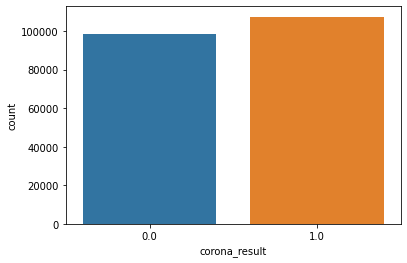

In [17]:
sn.countplot(df["corona_result"])

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result
cough,1.000000,0.405062,0.202896,0.195795,0.220778,0.377659
fever,0.405062,1.000000,0.160196,0.180182,0.247458,0.437327
sore_throat,0.202896,0.160196,1.000000,0.150116,0.282549,0.264471
shortness_of_breath,0.195795,0.180182,0.150116,1.000000,0.162358,0.222676
head_ache,0.220778,0.247458,0.282549,0.162358,1.000000,0.330164
corona_result,0.377659,0.437327,0.264471,0.222676,0.330164,1.000000


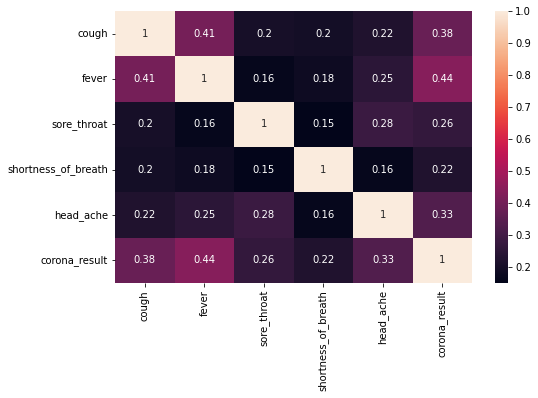

In [18]:
plt.figure(figsize=(8,5))
c=df.corr()
sn.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)
c

In [19]:

df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [20]:
X=df[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']]

In [21]:
y=df['corona_result']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7850334853926041

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[21266,  3522],
       [ 7552, 19175]], dtype=int64)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred_knn=knn.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred_knn)

0.7349703969717558

In [30]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
rfc=RandomForestClassifier(criterion='gini',max_depth=4,max_features='sqrt',n_estimators=100)

In [32]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [33]:
pred=rfc.predict(X_test)

In [34]:
accuracy_score(y_test,pred)

0.7850334853926041

In [35]:

from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [36]:

y_pred_svc=svm.predict(X_test)

In [37]:

accuracy_score(y_test,y_pred_svc)

0.7850334853926041